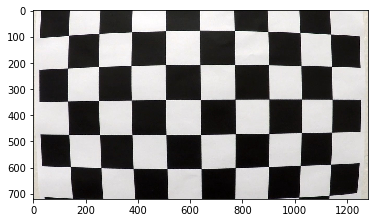

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

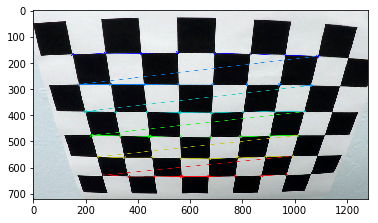

In [6]:
import glob

images = glob.glob('camera_cal/calibration*.jpg')
# Arrays to store object points and image points from all the images
objpoints = []
imgpoints = []

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

for fname in images:
    img = cv2.imread(fname)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    nx = 8#TODO: enter the number of inside corners in x
    ny = 6#TODO: enter the number of inside corners in y
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        objpoints.append(corners)
        imgpoints.append(objp)
    
    # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

In [18]:
objpoints

[array([[[  961.01141357,   147.0532074 ]],
 
        [[  996.99578857,   152.55279541]],
 
        [[ 1031.80725098,   158.23912048]],
 
        [[ 1064.56091309,   162.63667297]],
 
        [[ 1096.96740723,   168.4798584 ]],
 
        [[ 1127.01977539,   172.78608704]],
 
        [[ 1154.53991699,   177.91734314]],
 
        [[ 1180.38598633,   182.89987183]],
 
        [[  958.5725708 ,   199.68901062]],
 
        [[  996.46154785,   204.25901794]],
 
        [[ 1033.0078125 ,   207.97415161]],
 
        [[ 1066.90844727,   212.08950806]],
 
        [[ 1099.01403809,   215.99676514]],
 
        [[ 1126.84411621,   219.71018982]],
 
        [[ 1154.12438965,   223.19812012]],
 
        [[ 1179.71606445,   227.33105469]],
 
        [[  959.15118408,   253.77301025]],
 
        [[  997.59320068,   256.55007935]],
 
        [[ 1033.0390625 ,   258.99838257]],
 
        [[ 1067.73742676,   260.96878052]],
 
        [[ 1099.00793457,   264.027771  ]],
 
        [[ 1126.5592041 ,   265.68

In [21]:
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)# Delete this line
    return undist

In [22]:
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/calib3d/src/calibration.cpp:3060: error: (-210) objectPoints should contain vector of vectors of points of type Point3f in function collectCalibrationData
